In [481]:
import os
import cv2
from google.colab.patches import cv2_imshow
from skimage.feature import hog
import matplotlib.pyplot as plt
from skimage import data, exposure
import pandas as pd
import numpy as np

In [482]:
bird_path = "/content/bird"
butterfly_path = "/content/butterfly"

bird = os.listdir(bird_path)
butterfly = os.listdir(butterfly_path)

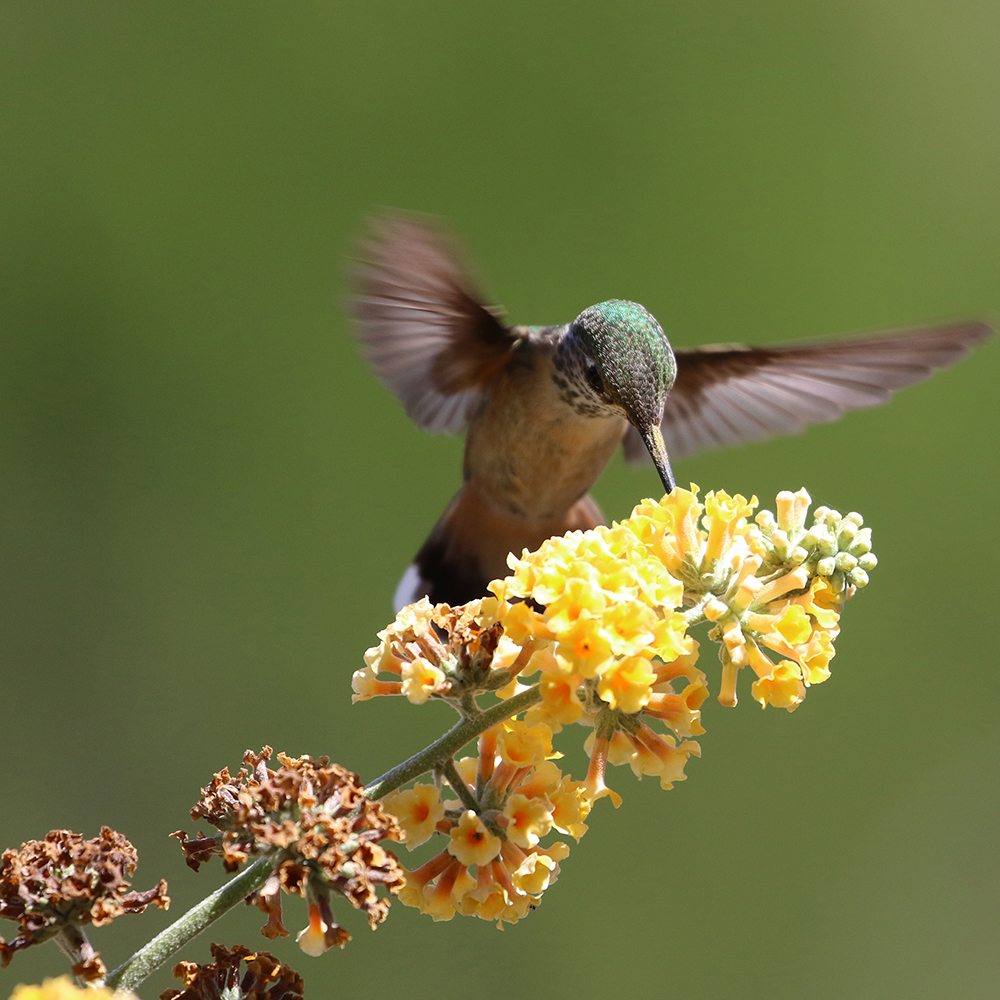

In [483]:
cv2_imshow(cv2.imread(f'{bird_path}/{bird[0]}'))

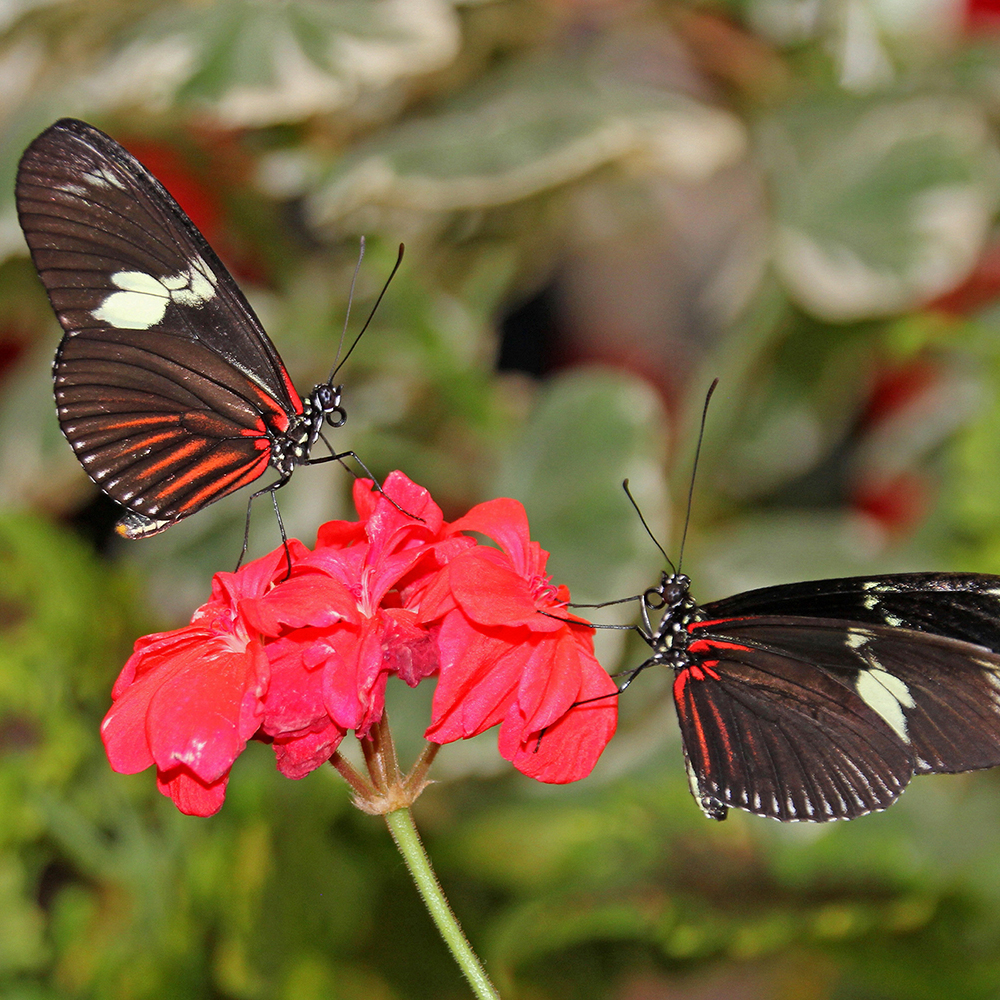

In [484]:
cv2_imshow(cv2.imread(f'{butterfly_path}/{butterfly[0]}'))

In [485]:
birds = list()
butterflies = list()

for image in bird:
  birds.append(cv2.imread(f'{bird_path}/{image}'))

for image in butterfly:
  butterflies.append(cv2.imread(f'{butterfly_path}/{image}'))

In [486]:
def make_hog(image):
  fd, hog_image = hog(
    image,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(4, 4),
    block_norm="L2",
    visualize=True
  )
  return fd, hog_image

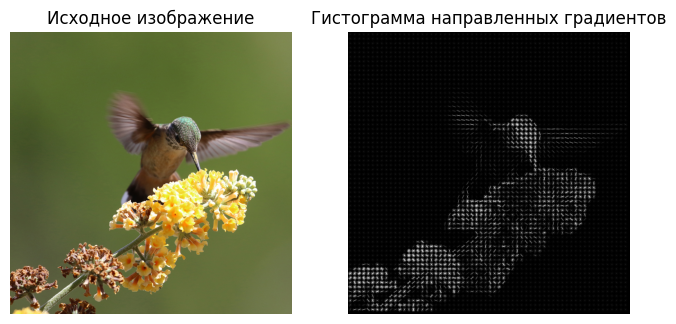

In [487]:
fd_m, hog_bird = make_hog(cv2.cvtColor(birds[0], cv2.COLOR_BGR2GRAY))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.axis("off")
ax2.axis("off")
ax1.set_title("Исходное изображение")
ax2.set_title("Гистограмма направленных градиентов")

ax1.imshow(cv2.cvtColor(birds[0], cv2.COLOR_BGR2RGB))

ax2.imshow(exposure.rescale_intensity(hog_bird, in_range=(0, 10)), cmap=plt.cm.gray)

plt.show()

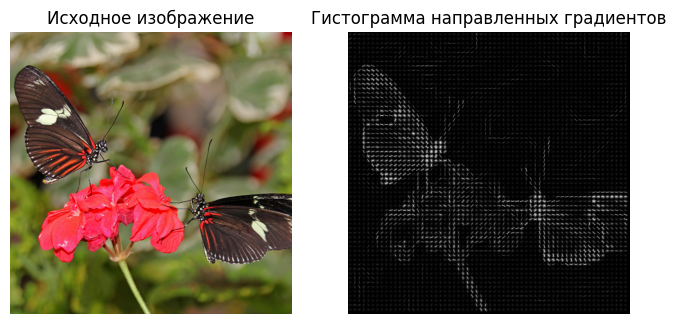

In [488]:
fd_s, hog_butterfly = make_hog(cv2.cvtColor(butterflies[0], cv2.COLOR_BGR2GRAY))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.axis("off")
ax2.axis("off")
ax1.set_title("Исходное изображение")
ax2.set_title("Гистограмма направленных градиентов")

ax1.imshow(cv2.cvtColor(butterflies[0], cv2.COLOR_BGR2RGB))

ax2.imshow(exposure.rescale_intensity(hog_butterfly, in_range=(0, 10)), cmap=plt.cm.gray)

plt.show()

In [489]:
hog_features = list()

for image in birds + butterflies:
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  resized_image = cv2.resize(gray_image, (300, 150), interpolation=cv2.INTER_AREA)
  fd, hog_image = make_hog(resized_image)
  hog_features.append(fd)

In [490]:
res_bird = [1 for i in range(len(birds))]
res_butterfly = [0 for i in range(len(butterflies))]

items = np.array(hog_features)
res = np.array(res_bird + res_butterfly).reshape(len(hog_features), 1)
df = np.hstack((items, res))
np.random.shuffle(df)

In [494]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [495]:
ind = round(len(hog_features) * 0.8)

x = df[:, :-1]
y = df[:, -1:]

x_train, y_train = x[0:ind], y[0:ind].ravel()
x_test, y_test = x[ind:len(hog_features)], y[ind:len(hog_features)].ravel()

clf = SVC()
clf.fit(x_train, y_train)
y_prediction = clf.predict(x_test)

print("accuracy_score:", accuracy_score(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

accuracy_score: 0.79
              precision    recall  f1-score   support

         0.0       0.75      0.85      0.80        48
         1.0       0.84      0.73      0.78        52

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100

